# Visualization of model metrics during training

In [ ]:
# The model metrics during training are saved from Tensorboard.

In [4]:
import os
import pandas as pd
from matplotlib import pyplot as plt 


### Setup

In [30]:
output_dir = r"/home/yiting/Documents/GitHub/lightning-pose/outputs"
model_dirs = ["2024-07-30/13-41-23", "2024-07-30/16-03-42"]
model_names = ["single-view", "multi-view"]
supervised_metrics = ["train_supervised_rmse", "val_supervised_rmse"]
unsupervised_metrics = ["train_temporal_loss_weighted", "train_pca_multiview_loss_weighted",
                        "train_pca_singleview_loss_weighted"]
total_metrics = ["total_loss"]
save_dir = r"/home/yiting/Documents/LP_projects/Model_perf/single_multi_comp/2024-07-30"

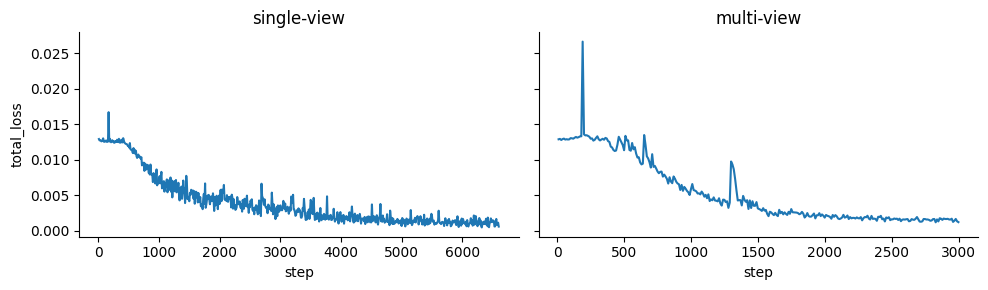

In [23]:
# Total metrics
fig, axs = plt.subplots(len(total_metrics), len(model_names), figsize=(5*len(model_names), 3*len(total_metrics)), sharey=True)
for m, (model_dir, model_name) in enumerate(zip(model_dirs, model_names)):
    for metrics in total_metrics:
        df = pd.read_csv(os.path.join(output_dir, model_dir, "tb_logs_vis", metrics + ".csv"))
        axs[m].plot(df.Step, df.Value)
        axs[m].set_title(model_name)
        axs[m].set_xlabel("step")
        # Remove upper and right boundary
        axs[m].spines['top'].set_visible(False)
        axs[m].spines['right'].set_visible(False)
        if m == 0:
            axs[m].set_ylabel(metrics)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(save_dir, "total_loss.png"))
 

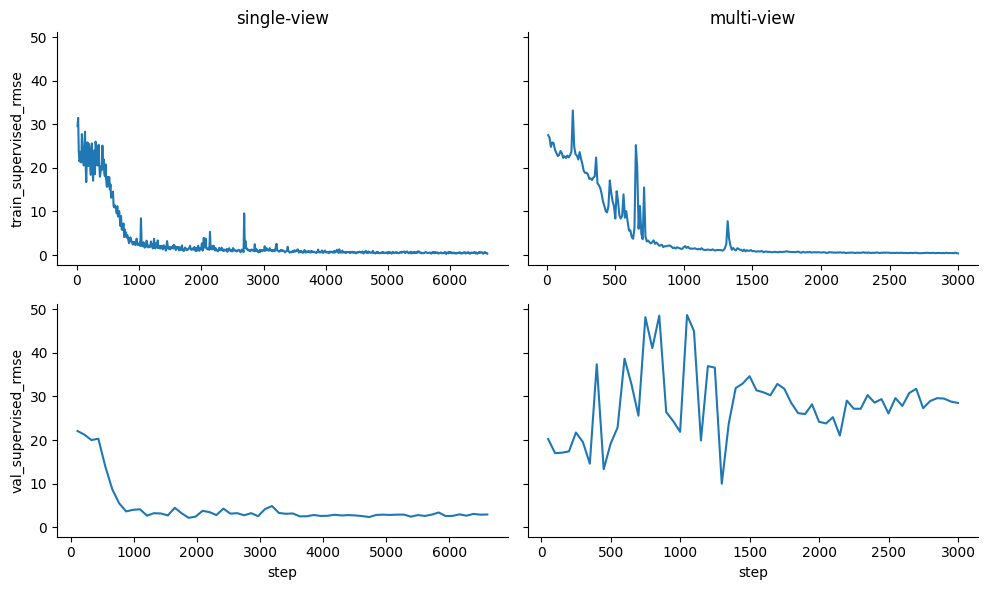

In [24]:
# Supervised metrics
fig, axs = plt.subplots(len(supervised_metrics), len(model_names), figsize=(5*len(model_names), 3*len(supervised_metrics)), sharey=True)
for mo, (model_dir, model_name) in enumerate(zip(model_dirs, model_names)):
    for me, metrics in enumerate(supervised_metrics):
        # Load data
        df = pd.read_csv(os.path.join(output_dir, model_dir, "tb_logs_vis", metrics + ".csv"))
        # Plot trace
        axs[me, mo].plot(df.Step, df.Value)
        # Remove upper and right boundary
        axs[me, mo].spines['top'].set_visible(False)
        axs[me, mo].spines['right'].set_visible(False)
        if me == 0:
            axs[me, mo].set_title(model_name)
        if me == len(supervised_metrics) - 1:
            axs[me, mo].set_xlabel("step")
        if mo == 0:
            axs[me, mo].set_ylabel(metrics)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(save_dir, "supervised_loss.png"))


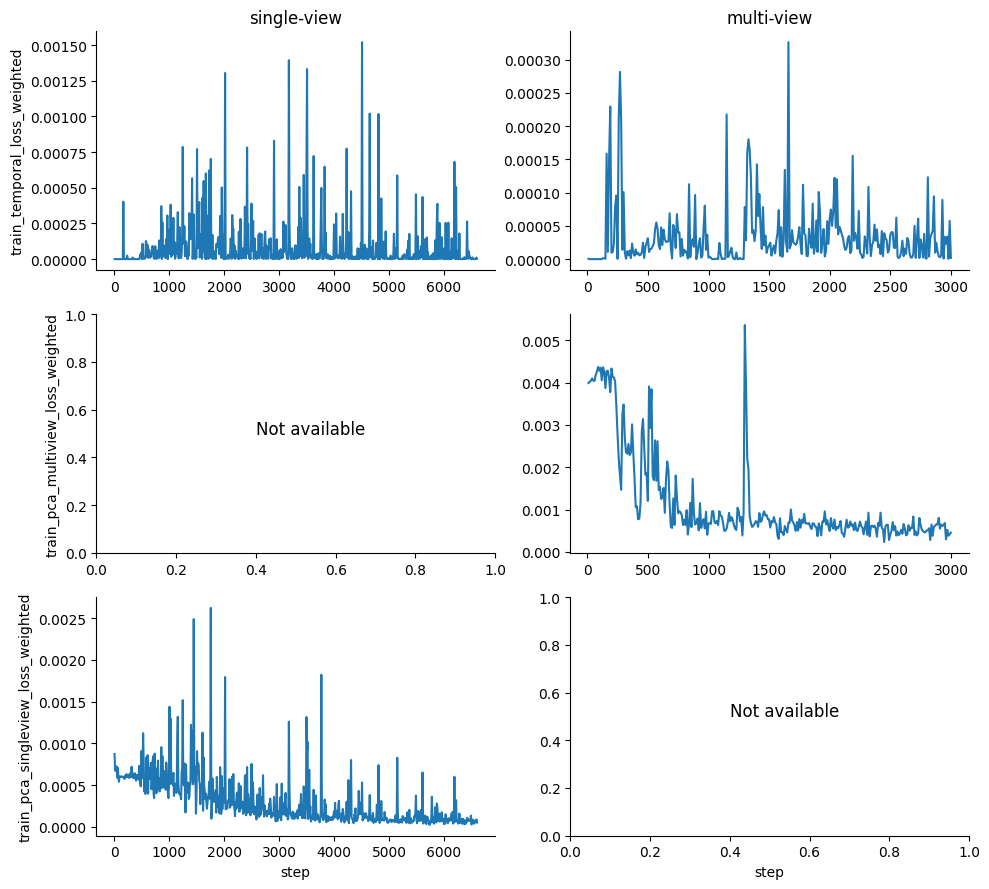

In [31]:
# Unsupervised_metrics
fig, axs = plt.subplots(len(unsupervised_metrics), len(model_names), figsize=(5*len(model_names), 3*len(unsupervised_metrics)))
for mo, (model_dir, model_name) in enumerate(zip(model_dirs, model_names)):
    for me, metrics in enumerate(unsupervised_metrics):
        # Check if the current model has this metrics
        if os.path.exists(os.path.join(output_dir, model_dir, "tb_logs_vis", metrics + ".csv")):
            # Load data
            df = pd.read_csv(os.path.join(output_dir, model_dir, "tb_logs_vis", metrics + ".csv"))
            # Plot trace
            axs[me, mo].plot(df.Step, df.Value)
        else:
            axs[me, mo].text(0.4, 0.5, 'Not available', fontsize=12, color='black')
        # Remove upper and right boundary
        axs[me, mo].spines['top'].set_visible(False)
        axs[me, mo].spines['right'].set_visible(False)
        if me == 0:
            axs[me, mo].set_title(model_name)
        if me == len(unsupervised_metrics) - 1:
            axs[me, mo].set_xlabel("step")
        if mo == 0:
            axs[me, mo].set_ylabel(metrics)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(save_dir, "unsupervised_loss.png"))